In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import plotly.graph_objects as go
from skimage import measure
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

In [114]:
np.random.seed(42)
n = 4000
a = np.random.uniform(-10, 10, n)
A = 3 * a
b = np.random.uniform(-10, 10, n)
B = 3 * b
c = np.random.uniform(-10, 10, n)
X = np.random.uniform(-10, 10, n)
alpha = a**2 - b
# remove negative values
beta = 2 * a**3 - 3 * a * b + c
y = X**3 + A * X**2 + B * X + c
df = pd.DataFrame({
    'X': X,
    'a': a,
    'b': b,
    'c': c,
    'y': y,
    'alpha': alpha,
    'beta': beta,
    'discriminant': 2 * alpha **(3/2),
})
df.head()

/tmp/ipykernel_5588/3840919297.py:21: RuntimeWarning:

invalid value encountered in power



,X,a,b,c,y,alpha,beta,discriminant
0,3.086126,-2.509198,1.439918,4.405358,-24.564648,4.856155,-16.351710,21.402713
1,-8.399349,9.014286,6.108647,3.745660,1165.101737,75.148708,1303.504481,1302.903563
2,-5.153404,4.639879,5.203219,-8.084916,144.282068,16.325257,119.267209,131.922854
3,5.473587,1.973170,-6.922002,8.451448,236.125819,10.815401,64.790973,71.136731
4,0.573717,-6.879627,-7.015011,1.369444,-17.308925,54.344281,-794.627999,801.236574


In [115]:
for index, row in df.iterrows():
    roots = np.roots([1, row['a'], row['b'], row['c']])
    for i, root in enumerate(roots):
        if np.isreal(root):
            df.at[index, f'root_{i}'] = root.real
        else:
            df.at[index, f'root_{i}'] = np.nan
            
df.head()

,X,a,b,c,y,alpha,beta,discriminant,root_0,root_1,root_2
0,3.086126,-2.509198,1.439918,4.405358,-24.564648,4.856155,-16.351710,21.402713,NaN,NaN,-0.940468
1,-8.399349,9.014286,6.108647,3.745660,1165.101737,75.148708,1303.504481,1302.903563,-8.335336,NaN,NaN
2,-5.153404,4.639879,5.203219,-8.084916,144.282068,16.325257,119.267209,131.922854,NaN,NaN,0.829869
3,5.473587,1.973170,-6.922002,8.451448,236.125819,10.815401,64.790973,71.136731,-4.138932,NaN,NaN
4,0.573717,-6.879627,-7.015011,1.369444,-17.308925,54.344281,-794.627999,801.236574,7.760794,-1.049328,0.168162


In [118]:
# where all roots are real, r = 0, otherwise r = 1
df['r'] = np.where(df[['root_0', 'root_1', 'root_2']].notnull().all(axis=1), False, True)
df['r'].value_counts()

r
True     2351
False    1649
Name: count, dtype: int64

In [48]:
df.head()

,X,a,b,c,y,alpha,beta,root_0,root_1,root_2,r
0,3.086126,-2.509198,1.439918,4.405358,-24.564648,4.856155,-16.351710,NaN,NaN,-0.940468,1
1,-8.399349,9.014286,6.108647,3.745660,1165.101737,75.148708,1303.504481,-8.335336,NaN,NaN,1
2,-5.153404,4.639879,5.203219,-8.084916,144.282068,16.325257,119.267209,NaN,NaN,0.829869,1
3,5.473587,1.973170,-6.922002,8.451448,236.125819,10.815401,64.790973,-4.138932,NaN,NaN,1
4,0.573717,-6.879627,-7.015011,1.369444,-17.308925,54.344281,-794.627999,7.760794,-1.049328,0.168162,0


In [38]:
test_beta = -794.627999
test_alpha = 54.344281
test_a = 1.973170
abs(test_beta) < 2*test_alpha **(3/2)

True

In [ ]:
phi = (1/3)*np.arcsin(test_beta/(2*test_alpha**(3/2)))
phi

np.float64(-0.4807571146218753)

In [41]:
np.pi/6

0.5235987755982988

In [40]:
first_root = 2 * np.sqrt(test_alpha) * np.sin(phi) - test_a
first_root

np.float64(-8.791409721785017)

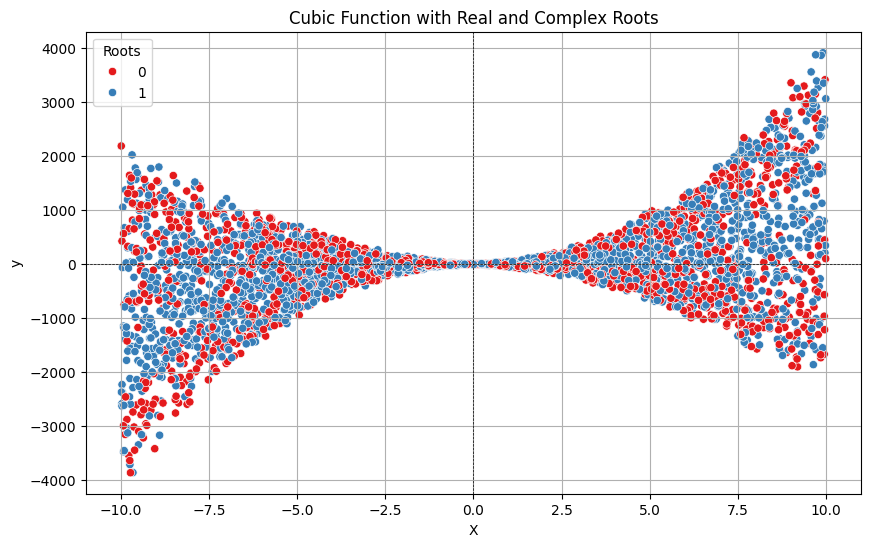

In [42]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='X', y='y', hue='r', palette='Set1')
plt.title('Cubic Function with Real and Complex Roots')
plt.xlabel('X')
plt.ylabel('y')
plt.axhline(0, color='black', lw=0.5, ls='--')
plt.axvline(0, color='black', lw=0.5, ls='--')
plt.grid()
plt.legend(title='Roots')
plt.show()

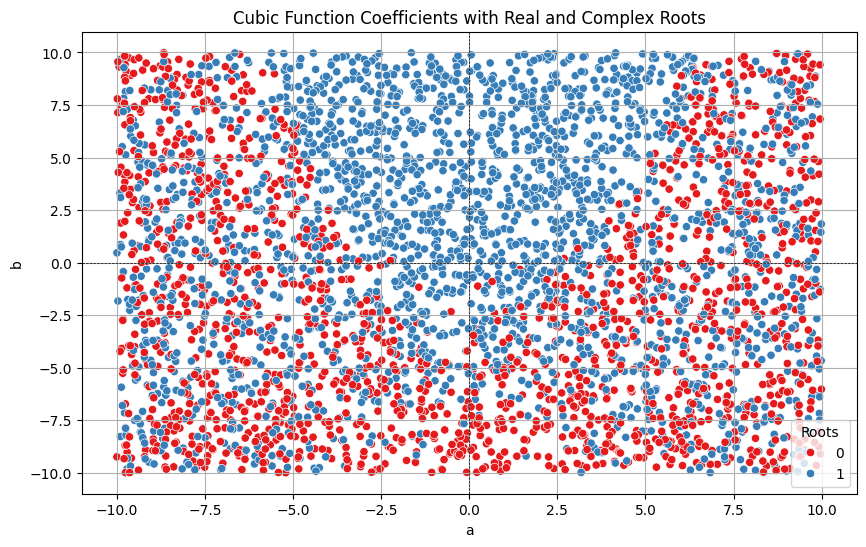

In [74]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='a', y='b', hue='r', palette='Set1')
plt.title('Cubic Function Coefficients with Real and Complex Roots')
plt.xlabel('a')
plt.ylabel('b')
plt.axhline(0, color='black', lw=0.5, ls='--')
plt.axvline(0, color='black', lw=0.5, ls='--')
plt.grid()
plt.legend(title='Roots')
plt.show()

/tmp/ipykernel_5588/452656432.py:4: RuntimeWarning: invalid value encountered in power
  beta_vals = 2 * alpha_vals ** (3/2)


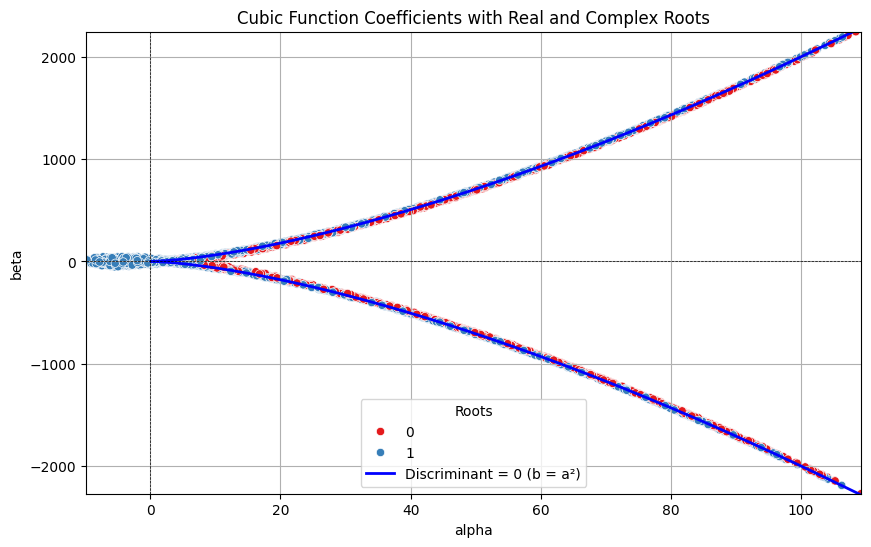

In [77]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='alpha', y='beta', hue='r', palette='Set1')
alpha_vals = np.linspace(df['alpha'].min(), df['alpha'].max(), 500)
beta_vals = 2 * alpha_vals ** (3/2)
plt.plot(alpha_vals, beta_vals, color='blue', linestyle='-', linewidth=2, label='Discriminant = 0 (b = a²)')
plt.plot(alpha_vals, -beta_vals, color='blue', linestyle='-', linewidth=2)
plt.xlim(df['alpha'].min(), df['alpha'].max())
plt.ylim(df['beta'].min(), df['beta'].max())
plt.title('Cubic Function Coefficients with Real and Complex Roots')
plt.xlabel('alpha')
plt.ylabel('beta')
plt.axhline(0, color='black', lw=0.5, ls='--')
plt.axvline(0, color='black', lw=0.5, ls='--')
plt.grid()
plt.legend(title='Roots')
plt.show()

In [121]:
svm = SVC(kernel='rbf', C=1.0)
X = df[['a', 'b', 'c']]
y = df['r']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
accuracy = np.mean(y_pred == y_test)
print(f'Accuracy of SVM model: {accuracy:.2f}')

Accuracy of SVM model: 0.95


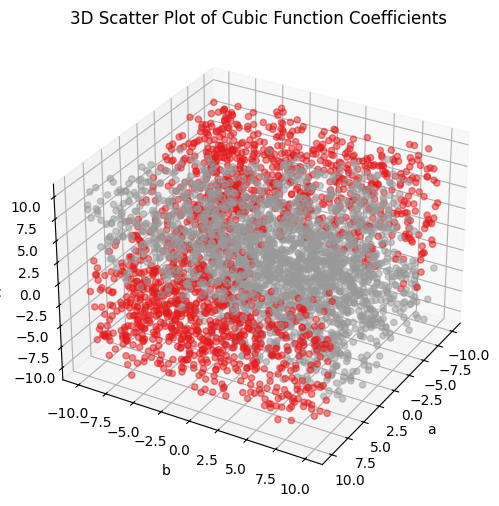

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       342
           1       0.96      0.96      0.96       458

    accuracy                           0.95       800
   macro avg       0.95      0.95      0.95       800
weighted avg       0.95      0.95      0.95       800



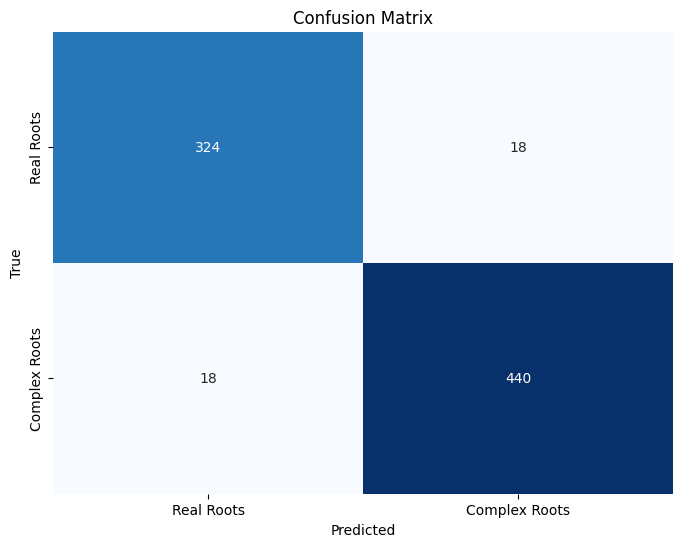

In [87]:
# plot 3d decision boundary using svm model
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X['a'], X['b'], X['c'], c=y, cmap='Set1', marker='o', alpha=0.5)
ax.set_xlabel('a')
ax.set_ylabel('b')
ax.set_zlabel('c')
ax.set_title('3D Scatter Plot of Cubic Function Coefficients')
ax.view_init(30, 30)
plt.show()
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.xticks(ticks=[0.5, 1.5], labels=['Real Roots', 'Complex Roots'])
plt.yticks(ticks=[0.5, 1.5], labels=['Real Roots', 'Complex Roots'])
plt.show()

In [119]:
# 2. Calculate Theoretical Boundary
lim = 6 # Grid limits slightly larger than sample range
n_points = 100 # Resolution for marching cubes grid (adjust for performance/smoothness)
a_range = np.linspace(-lim, lim, n_points)
b_range = np.linspace(-lim, lim, n_points)
c_range = np.linspace(-lim, lim, n_points)
a_grid, b_grid, c_grid = np.meshgrid(a_range, b_range, c_range, indexing='ij') # Use 'ij' indexing

# Calculate alpha and beta on the grid
alpha_grid = a_grid**2 - b_grid
beta_grid = 2 * a_grid**3 - 3 * a_grid * b_grid + c_grid

# Calculate the function whose zero level set is the boundary: 4*alpha^3 - beta^2
# This is proportional to the discriminant. The boundary is where it's zero.
boundary_function = 4 * alpha_grid**3 - beta_grid**2

# Use marching cubes to find the surface where boundary_function = 0
try:
    verts_theo, faces_theo, _, _ = measure.marching_cubes(boundary_function, level=0, spacing=(2*lim/n_points, 2*lim/n_points, 2*lim/n_points))
    # Adjust vertex coordinates to match the original a, b, c space
    verts_theo += np.array([-lim, -lim, -lim])
    valid_mesh = True
except ValueError:
    print("Marching cubes did not find the level set. Check grid range or level.")
    valid_mesh = False


# 3. Plot
fig = go.Figure()

# Add theoretical decision boundary mesh (if found)
if valid_mesh:
    x_theo, y_theo, z_theo = verts_theo.T
    i_theo, j_theo, k_theo = faces_theo.T
    fig.add_trace(go.Mesh3d(
        x=x_theo, y=y_theo, z=z_theo,
        i=i_theo, j=j_theo, k=k_theo,
        opacity=0.3, # Make it semi-transparent
        flatshading=True, # Looks better for this surface
        color='red',
        name='Theoretical Boundary ($\Delta = 0$)' # Use LaTeX for Delta
    ))

# Sample points for the 3D plot
n_sample_plot = 1000 # Number of points to plot
df_sample = df.sample(n=n_sample_plot, random_state=1)

# Add sample points colored by root type
fig.add_trace(go.Scatter3d(
    x=df_sample.loc[~df_sample['r'], 'a'], # Tilde negates the boolean
    y=df_sample.loc[~df_sample['r'], 'b'],
    z=df_sample.loc[~df_sample['r'], 'c'],
    mode='markers',
    marker=dict(size=3, color='green', opacity=0.6),
    name='All Real Roots ($\Delta \ge 0$)' # Correct condition
))
fig.add_trace(go.Scatter3d(
    x=df_sample.loc[df_sample['r'], 'a'],
    y=df_sample.loc[df_sample['r'], 'b'],
    z=df_sample.loc[df_sample['r'], 'c'],
    mode='markers',
    marker=dict(size=3, color='orange', opacity=0.6),
    name='Has Complex Roots ($\Delta < 0$)' # Correct condition
))

# Update layout
fig.update_layout(
    title='Theoretical Decision Boundary for Cubic Roots in (a, b, c) Space',
    scene=dict(
        xaxis_title='Coefficient a',
        yaxis_title='Coefficient b',
        zaxis_title='Coefficient c',
        xaxis=dict(range=[-lim, lim]), # Set axis limits to match grid
        yaxis=dict(range=[-lim, lim]),
        zaxis=dict(range=[-lim, lim]),
        aspectmode='cube' # Ensures equal aspect ratio
    ),
    legend=dict(x=0.01, y=0.99), # Position legend
    margin=dict(l=0, r=0, b=0, t=40) # Adjust margins
)

# Show the figure
fig.show()

In [122]:
# Sample points for the 3D plot
sample_idx = np.random.choice(range(len(X)), 1000)
X_sample = X.iloc[sample_idx].values
y_sample = y.iloc[sample_idx].values

# Generate predictions on a 3D grid
xx, yy, zz = np.mgrid[-lim:lim:20j, -lim:lim:20j, -lim:lim:20j]
grid_points = np.vstack([xx.ravel(), yy.ravel(), zz.ravel()]).T
predictions = svm.predict(grid_points).reshape(xx.shape)

# Use marching cubes to get a mesh of the decision boundary
verts, faces, _, _ = measure.marching_cubes(predictions, level=0.5)
verts = verts / 20 * (2*lim) - lim  # Scale to original dimensions

# Create mesh for the decision boundary
x, y, z = verts.T
i, j, k = faces.T
fig = go.Figure(data=[
    go.Mesh3d(x=x, y=y, z=z, i=i, j=j, k=k, opacity=0.3, color='green'),
    # Add scatter points for your data
    go.Scatter3d(x=X_sample[y_sample==0, 0], y=X_sample[y_sample==0, 1], z=X_sample[y_sample==0, 2],
                 mode='markers', marker=dict(size=3, color='blue'), name='All Real Roots'),
    go.Scatter3d(x=X_sample[y_sample==1, 0], y=X_sample[y_sample==1, 1], z=X_sample[y_sample==1, 2],
                 mode='markers', marker=dict(size=3, color='red'), name='Has Complex Roots')
])
fig.update_layout(scene=dict(xaxis_title='a', yaxis_title='b', zaxis_title='c'))
fig.show()

/home/riley/base/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but SVC was fitted with feature names



In [126]:
for depth in range(3, 10):
    dt = DecisionTreeClassifier(max_depth=depth)
    dt.fit(X_train, y_train)
    y_pred = dt.predict(X_test)
    accuracy = np.mean(y_pred == y_test)
    print(f'Accuracy of Decision Tree model with depth {depth}: {accuracy:.2f}')

Accuracy of Decision Tree model with depth 3: 0.76
Accuracy of Decision Tree model with depth 4: 0.87
Accuracy of Decision Tree model with depth 5: 0.86
Accuracy of Decision Tree model with depth 6: 0.90
Accuracy of Decision Tree model with depth 7: 0.93
Accuracy of Decision Tree model with depth 8: 0.94
Accuracy of Decision Tree model with depth 9: 0.94


Accuracy of Decision Tree model with depth 7: 0.94
              precision    recall  f1-score   support

       False       0.95      0.90      0.92       342
        True       0.93      0.97      0.95       458

    accuracy                           0.94       800
   macro avg       0.94      0.93      0.94       800
weighted avg       0.94      0.94      0.94       800



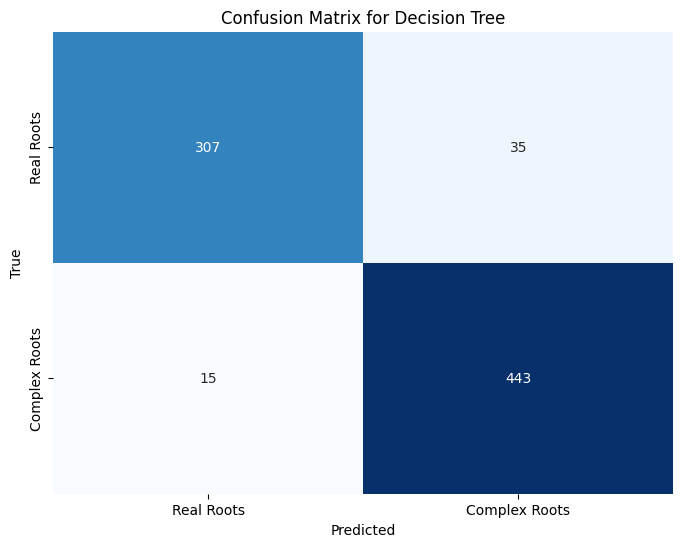

In [127]:
dt = DecisionTreeClassifier(max_depth=7)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
accuracy = np.mean(y_pred == y_test)
print(f'Accuracy of Decision Tree model with depth 7: {accuracy:.2f}')
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.xticks(ticks=[0.5, 1.5], labels=['Real Roots', 'Complex Roots'])
plt.yticks(ticks=[0.5, 1.5], labels=['Real Roots', 'Complex Roots'])
plt.show()

In [128]:
# Sample points for the 3D plot
sample_idx = np.random.choice(range(len(X)), 1000)
X_sample = X.iloc[sample_idx].values
y_sample = y.iloc[sample_idx].values

# Generate predictions on a 3D grid
xx, yy, zz = np.mgrid[-lim:lim:20j, -lim:lim:20j, -lim:lim:20j]
grid_points = np.vstack([xx.ravel(), yy.ravel(), zz.ravel()]).T
predictions = dt.predict(grid_points).reshape(xx.shape)

# Use marching cubes to get a mesh of the decision boundary
verts, faces, _, _ = measure.marching_cubes(predictions, level=0.5)
verts = verts / 20 * (2*lim) - lim  # Scale to original dimensions

# Create mesh for the decision boundary
x, y, z = verts.T
i, j, k = faces.T
fig = go.Figure(data=[
    go.Mesh3d(x=x, y=y, z=z, i=i, j=j, k=k, opacity=0.3, color='green'),
    # Add scatter points for your data
    go.Scatter3d(x=X_sample[y_sample==0, 0], y=X_sample[y_sample==0, 1], z=X_sample[y_sample==0, 2],
                 mode='markers', marker=dict(size=3, color='blue'), name='All Real Roots'),
    go.Scatter3d(x=X_sample[y_sample==1, 0], y=X_sample[y_sample==1, 1], z=X_sample[y_sample==1, 2],
                 mode='markers', marker=dict(size=3, color='red'), name='Has Complex Roots')
])
fig.update_layout(scene=dict(xaxis_title='a', yaxis_title='b', zaxis_title='c'))
fig.show()

/home/riley/base/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



Accuracy of MLP model: 0.98
              precision    recall  f1-score   support

       False       0.97      0.98      0.98       342
        True       0.98      0.98      0.98       458

    accuracy                           0.98       800
   macro avg       0.98      0.98      0.98       800
weighted avg       0.98      0.98      0.98       800



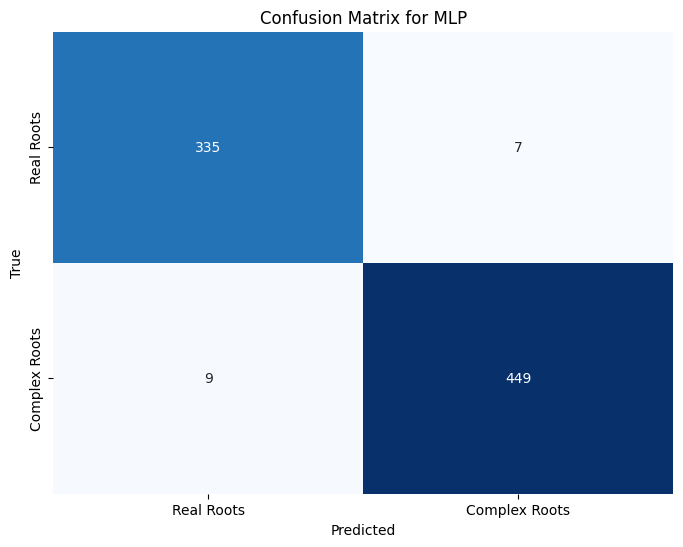

In [129]:
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)
accuracy = np.mean(y_pred == y_test)
print(f'Accuracy of MLP model: {accuracy:.2f}')
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for MLP')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.xticks(ticks=[0.5, 1.5], labels=['Real Roots', 'Complex Roots'])
plt.yticks(ticks=[0.5, 1.5], labels=['Real Roots', 'Complex Roots'])
plt.show()

In [131]:
# Generate predictions on a 3D grid
xx, yy, zz = np.mgrid[-lim:lim:20j, -lim:lim:20j, -lim:lim:20j]
grid_points = np.vstack([xx.ravel(), yy.ravel(), zz.ravel()]).T
predictions = mlp.predict(grid_points).reshape(xx.shape)

# Use marching cubes to get a mesh of the decision boundary
verts, faces, _, _ = measure.marching_cubes(predictions, level=0.5)
verts = verts / 20 * (2*lim) - lim  # Scale to original dimensions

# Create mesh for the decision boundary
x, y, z = verts.T
i, j, k = faces.T
fig = go.Figure(data=[
    go.Mesh3d(x=x, y=y, z=z, i=i, j=j, k=k, opacity=0.3, color='green'),
    # Add scatter points for your data
    go.Scatter3d(x=X_sample[y_sample==0, 0], y=X_sample[y_sample==0, 1], z=X_sample[y_sample==0, 2],
                 mode='markers', marker=dict(size=3, color='blue'), name='All Real Roots'),
    go.Scatter3d(x=X_sample[y_sample==1, 0], y=X_sample[y_sample==1, 1], z=X_sample[y_sample==1, 2],
                 mode='markers', marker=dict(size=3, color='red'), name='Has Complex Roots')
])
fig.update_layout(scene=dict(xaxis_title='a', yaxis_title='b', zaxis_title='c'))
fig.show()

/home/riley/base/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but MLPClassifier was fitted with feature names

